## **Customer Segmentation for Matrketing Analytics**

**Objective:** *To Segment the Customers visiting Mall according to their Past Behaviors.*

Customer segmentation is a process of identifying and describing the different types of customers that exist within a given population. The objective of customer segmentation is to understand each group's needs and behaviors, and to optimize business operations by tailoring the product or service offerings to meet those needs.

The most common technique used to segment customers is clustering. Clustering is a method of grouping customer data so that similar customers are grouped together, while dissimilar ones are placed into separate clusters. K-Means Clustering is an advanced form of clustering, which uses a mathematical model to cluster the data points based on their distance from each other.


**Loading the Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Reading the Dataset**

In [3]:
df = pd.read_csv("C:/Users/DELL/Downloads/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Shape of the Dataset**

In [4]:
df.shape

(200, 5)

**Sample of the Datset**

In [5]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
193,194,Female,38,113,91
140,141,Female,57,75,5
43,44,Female,31,39,61
192,193,Male,33,113,8
195,196,Female,35,120,79
114,115,Female,18,65,48
6,7,Female,35,18,6
7,8,Female,23,18,94
60,61,Male,70,46,56
187,188,Male,28,101,68


## **Exploratory Data Analysis (EDA)**

**Info of the DataSet**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Checking Missing Values**

In [7]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

*We have no missing Values in the DataSet.*

**Pairwise relationship between Variables of the Dataset**

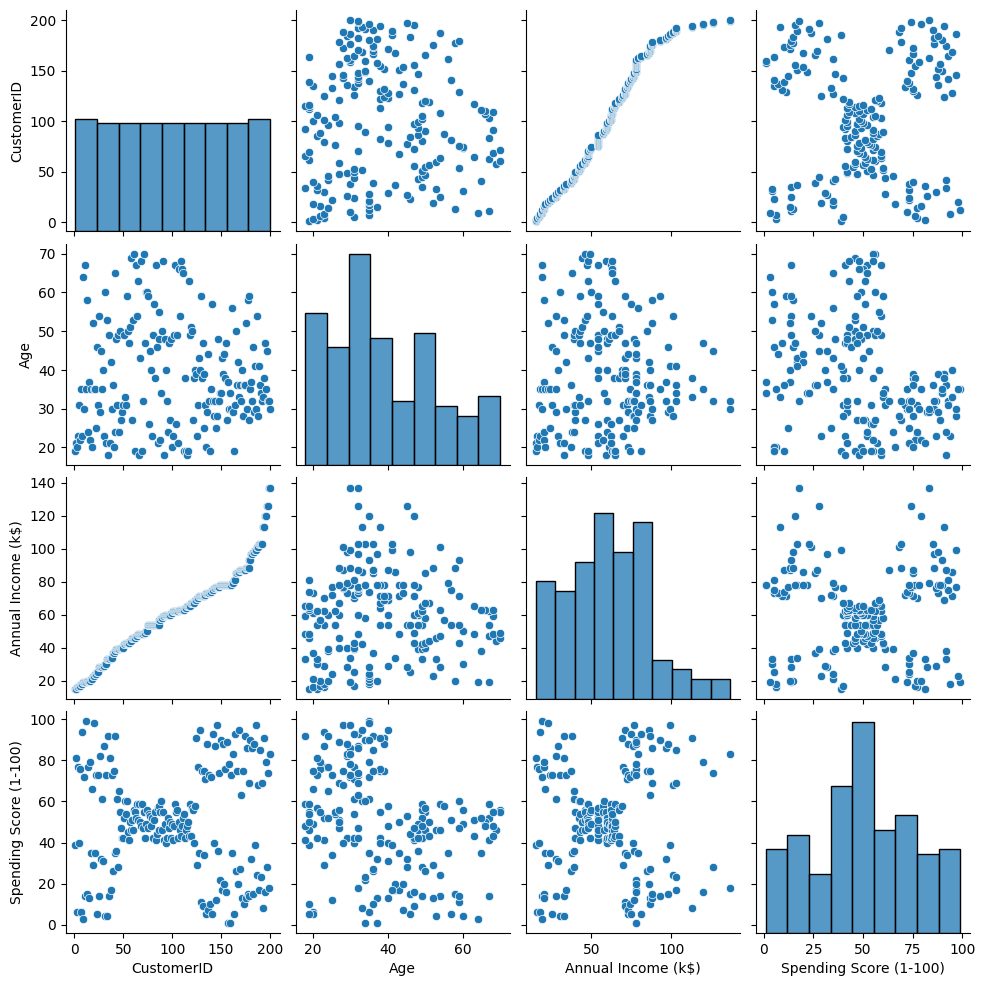

In [8]:
sns.pairplot(df)
plt.show()

**Correlation**

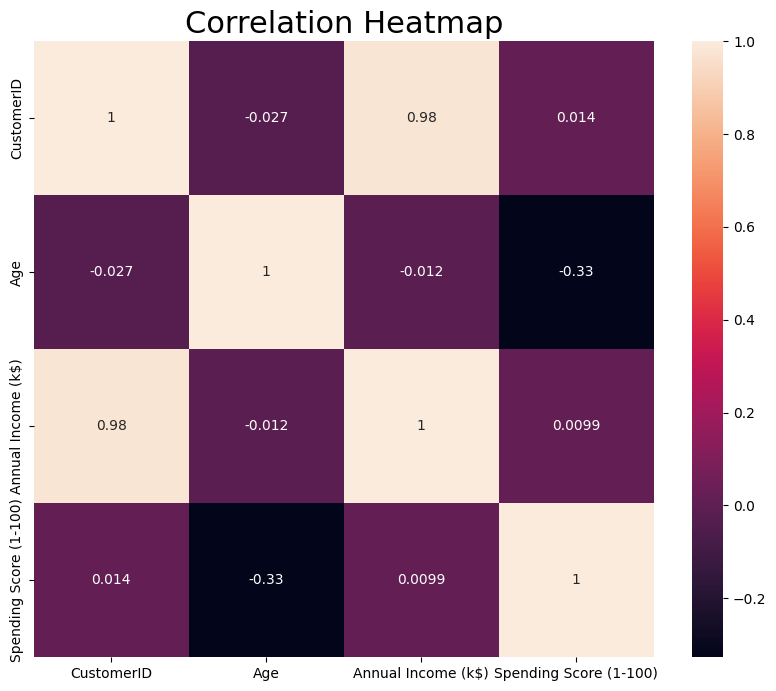

In [9]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap", fontsize = 22)
plt.show()

*No multicolinearity as per the Correlation*

**Analyzing the data with respect to "Spending Score"**

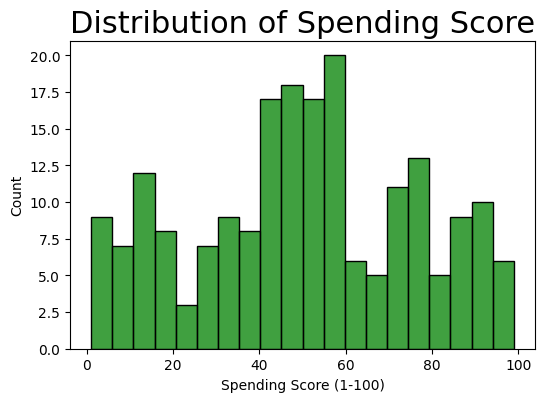

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['Spending Score (1-100)'], bins= 20, color='g')
plt.title("Distribution of Spending Score", fontsize = 22)
plt.show()

*Customers have high spending score between 40 to 60*

**Distribution of Spending Score with respect to Age**

<Figure size 1200x1000 with 0 Axes>

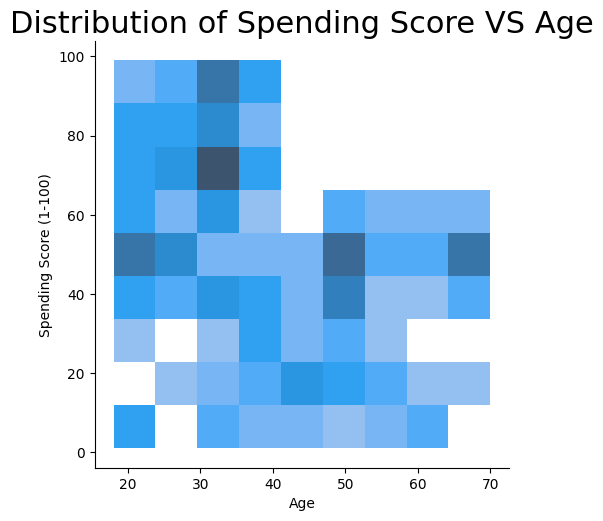

In [11]:
plt.figure(figsize=(12,10))
sns.displot(data= df,y='Spending Score (1-100)',x='Age')
plt.title("Distribution of Spending Score VS Age", fontsize = 22)
plt.show()

*The Age of Customer from 20 to 40 have high Spending Score*

**Distribution of Spending Score with respect to Annual Income**

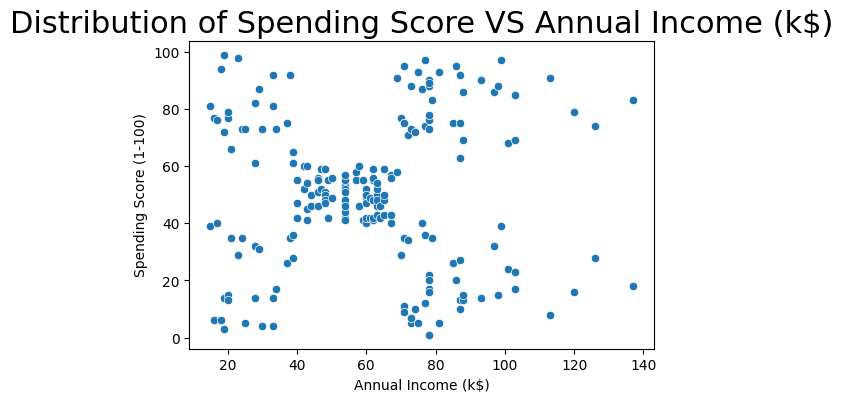

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(data= df,y='Spending Score (1-100)',x='Annual Income (k$)')
plt.title("Distribution of Spending Score VS Annual Income (k$)", fontsize = 22)
plt.show()

*Customers having Annual Income range 20k to 40k and 80k to 100k have higher Spending Score. And a big chunk of customers are around ~50k income with ~50 Spending Score*

**Analyzing the data with respect to "Annual Income"**

**Distribution of Annual Income**

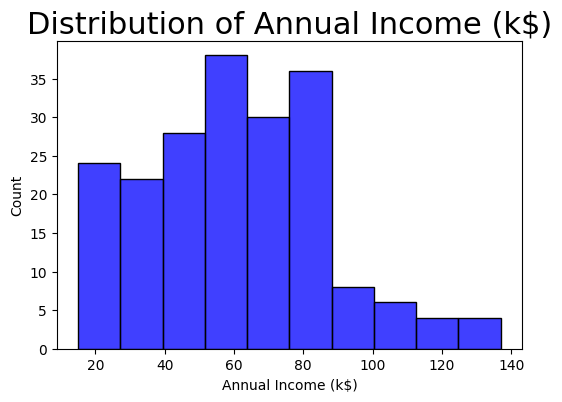

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df['Annual Income (k$)'], color='b')
plt.title("Distribution of Annual Income (k$)", fontsize = 22)
plt.show()

*Most customers visiting Mall have Annual Income of 50k to 80k.*

**Distributuion Annual Income with respect to Age**

<Figure size 1200x1000 with 0 Axes>

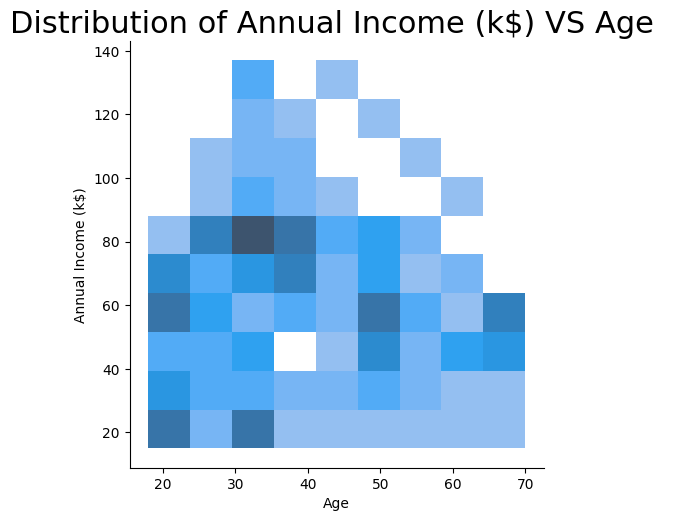

In [14]:
plt.figure(figsize=(12,10))
sns.displot(data= df,y='Annual Income (k$)',x='Age')
plt.title("Distribution of Annual Income (k$) VS Age ", fontsize = 22)
plt.show()

*High Annual Income Customers are around the age of 30 to 45.*

**Average Income distribution by Gender**

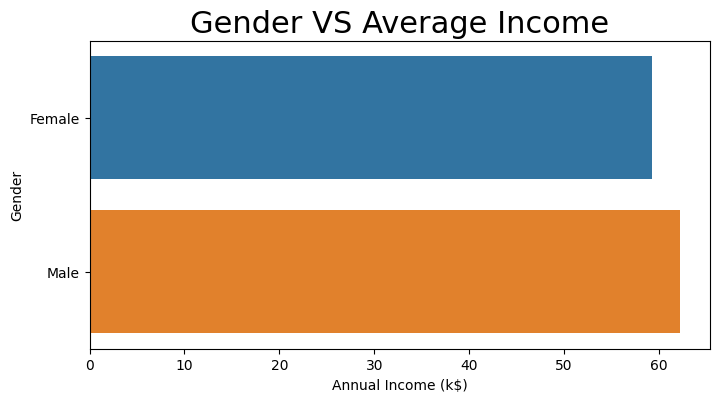

In [15]:
gender_income = df.groupby('Gender')['Annual Income (k$)'].agg('mean').reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data= gender_income, y='Gender', x='Annual Income (k$)')
plt.title("Gender VS Average Income", fontsize = 22)
plt.show()

*Males have more average Annual Income than Females*

**Descriptive Statistics**

In [16]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Categorical Distribution**

In [17]:
df.select_dtypes("object").describe()

,Gender
count,200
unique,2
top,Female
freq,112


**Gender Distribution**

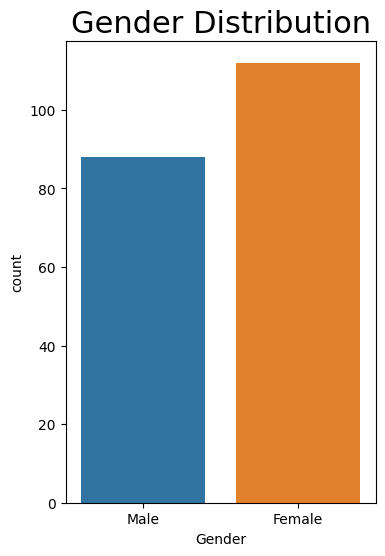

In [18]:
plt.figure(figsize=(4,6))
sns.countplot(x=df['Gender'])
plt.title("Gender Distribution", fontsize = 22)
plt.show()

**Distribution of Annual Income & Age**

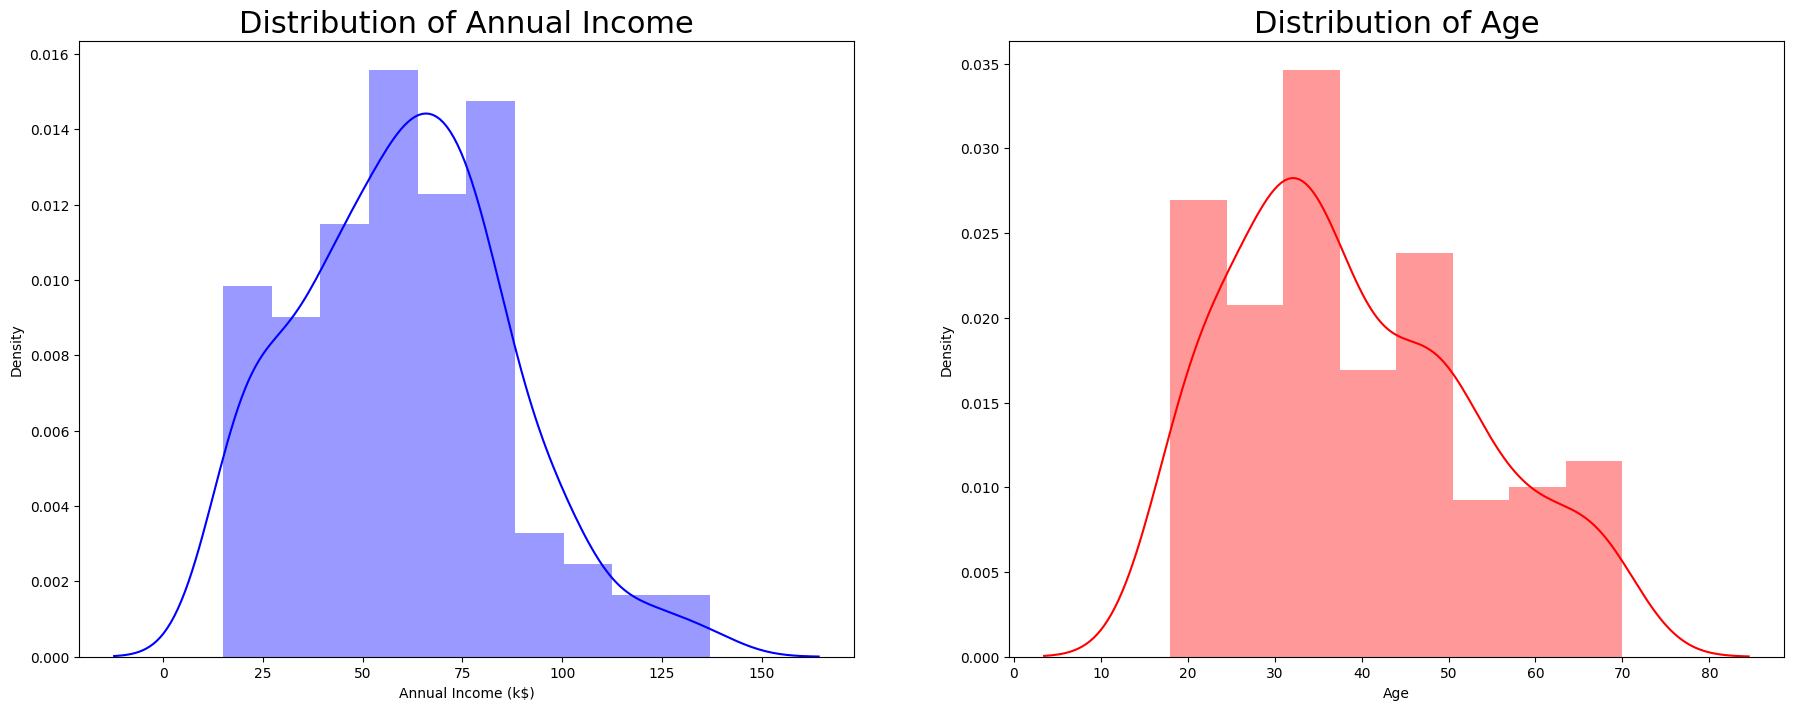

In [19]:
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
sns.distplot(df['Annual Income (k$)'], color='b')
plt.title("Distribution of Annual Income", fontsize = 22)

plt.subplot(1,2,2)
sns.distplot(df['Age'], color='r')
plt.title("Distribution of Age", fontsize = 22)
plt.show()

*Most of the People earn 40k to 80k annually. Very few people earn more than 100k. And the least annual income is 20k*
*Most mall visitors are of age 20 to 35 years old. Senior citizens visits less to the mall.*

**Gender VS Spending Score**

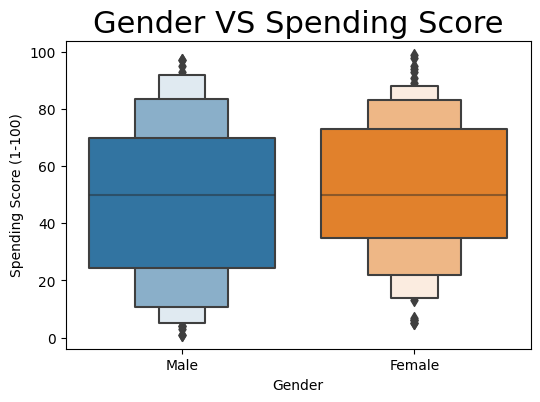

In [20]:
plt.figure(figsize=(6,4))
sns.boxenplot(x=df['Gender'], y=df['Spending Score (1-100)'])
plt.title("Gender VS Spending Score", fontsize = 22)
plt.show()

*Females are Shopping Leaders. They have compratively high Spending Score than Males.*

**Age VS Annual Income & Spending Score**

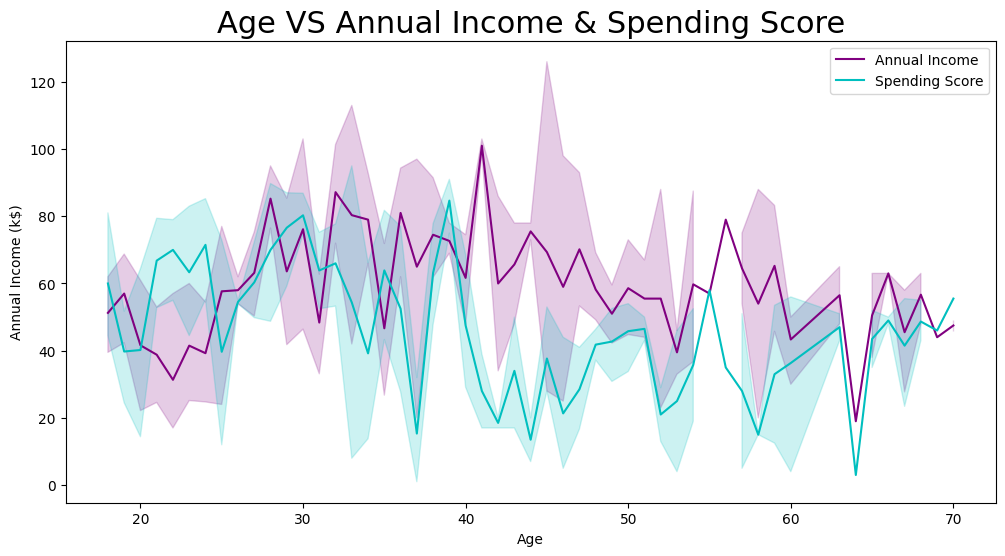

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = df['Age'], y = df['Annual Income (k$)'], color = 'purple', label="Annual Income")
sns.lineplot(x = df['Age'], y = df['Spending Score (1-100)'], color= 'c', label="Spending Score")
plt.title("Age VS Annual Income & Spending Score", fontsize= 22)
plt.legend()
plt.show()

## **Clustering**

Finding Clusters who relates to similar behaviour according to "Age, Annual Income & Spending Score"

In [22]:
X = df.iloc[:,2:]
X.shape

(200, 3)

**K-Means Clustering**

Ploting Dendogram

In [23]:
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)
fig = ff.create_dendrogram(X)
fig.update_layout(width=1000, height=500)
fig.show()

The Elbow method to find optimal number of Clusters.

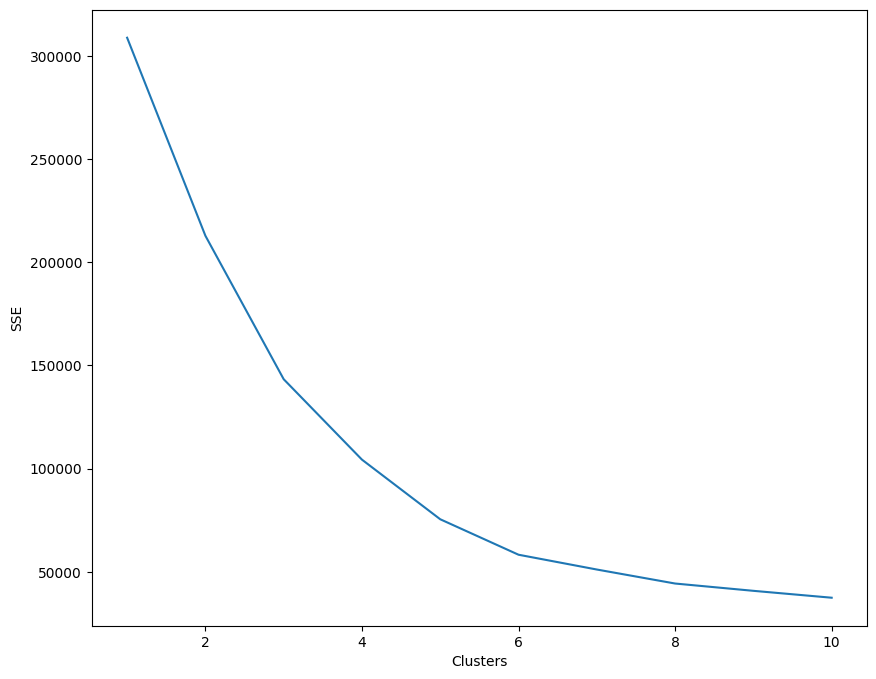

In [24]:
from sklearn.cluster import KMeans
Inter = []
for i in range(1,11):
  model = KMeans(n_clusters = i)
  model.fit(X)
  Inter.append(model.inertia_)

# plotting the Elbow
plt.figure(figsize = (10, 8))
plt.plot(np.arange(1,11), Inter)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

5 Clusters Identified as per Elbow Method

For n_clusters = 2 The average silhouette_score is : 0.293166070535953


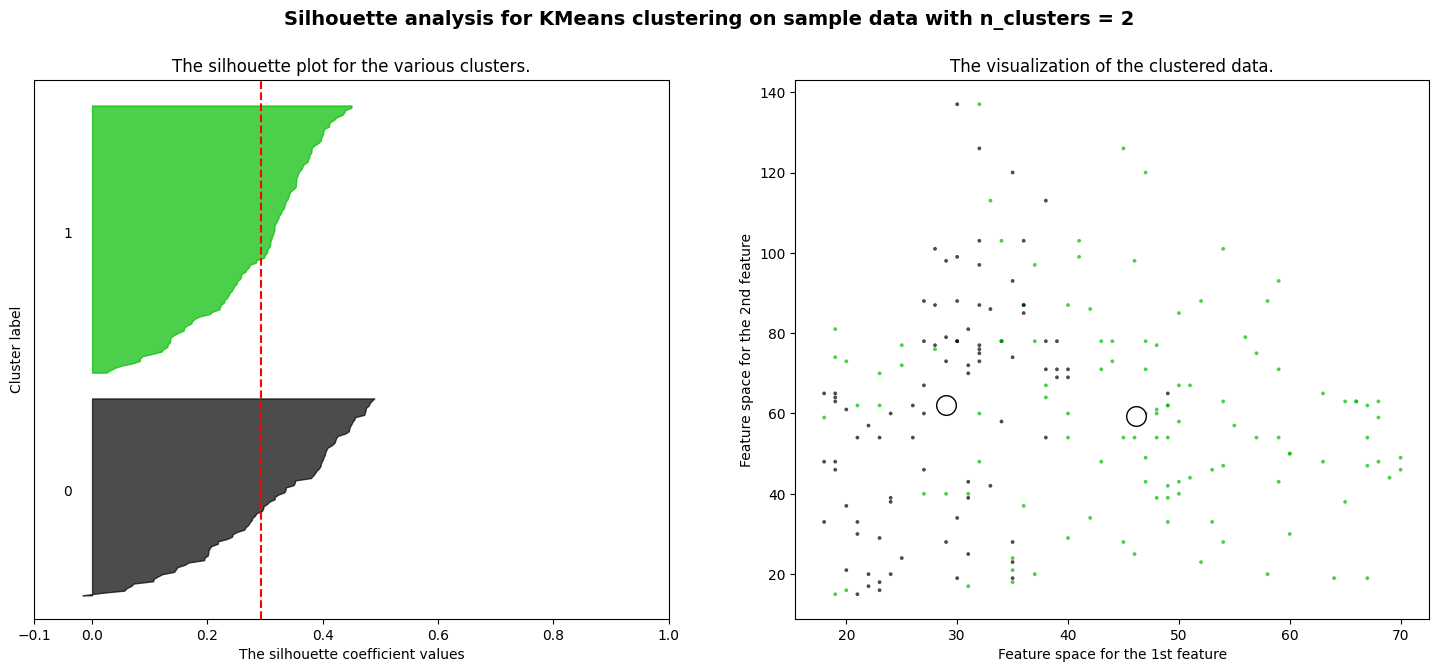

For n_clusters = 3 The average silhouette_score is : 0.3839349967742105


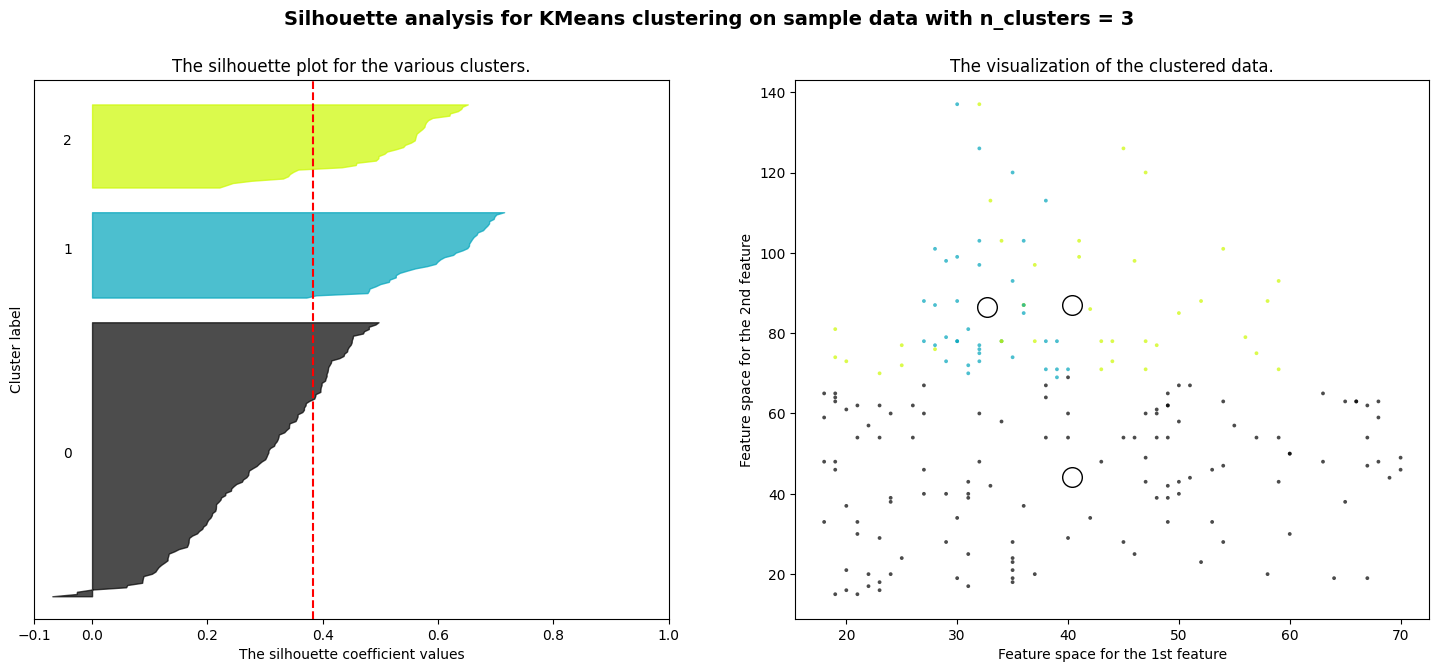

For n_clusters = 4 The average silhouette_score is : 0.40546302077733304


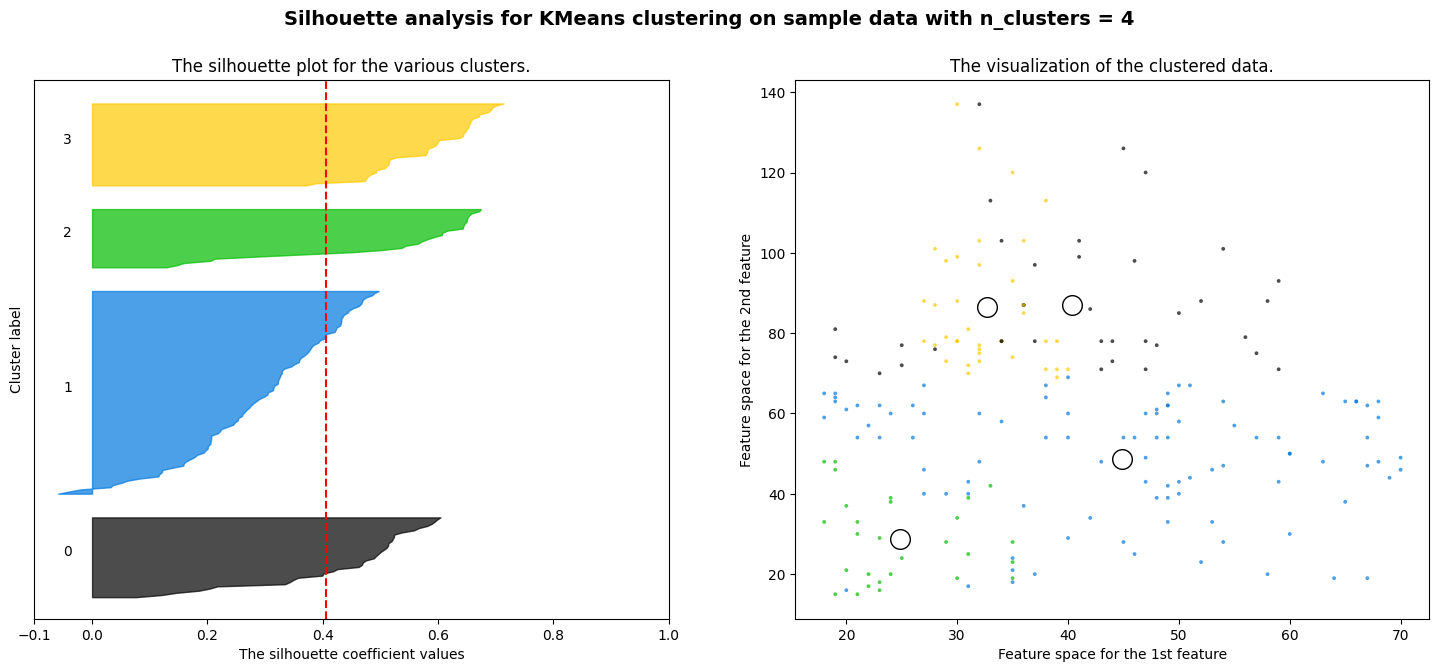

For n_clusters = 5 The average silhouette_score is : 0.44428597560893024


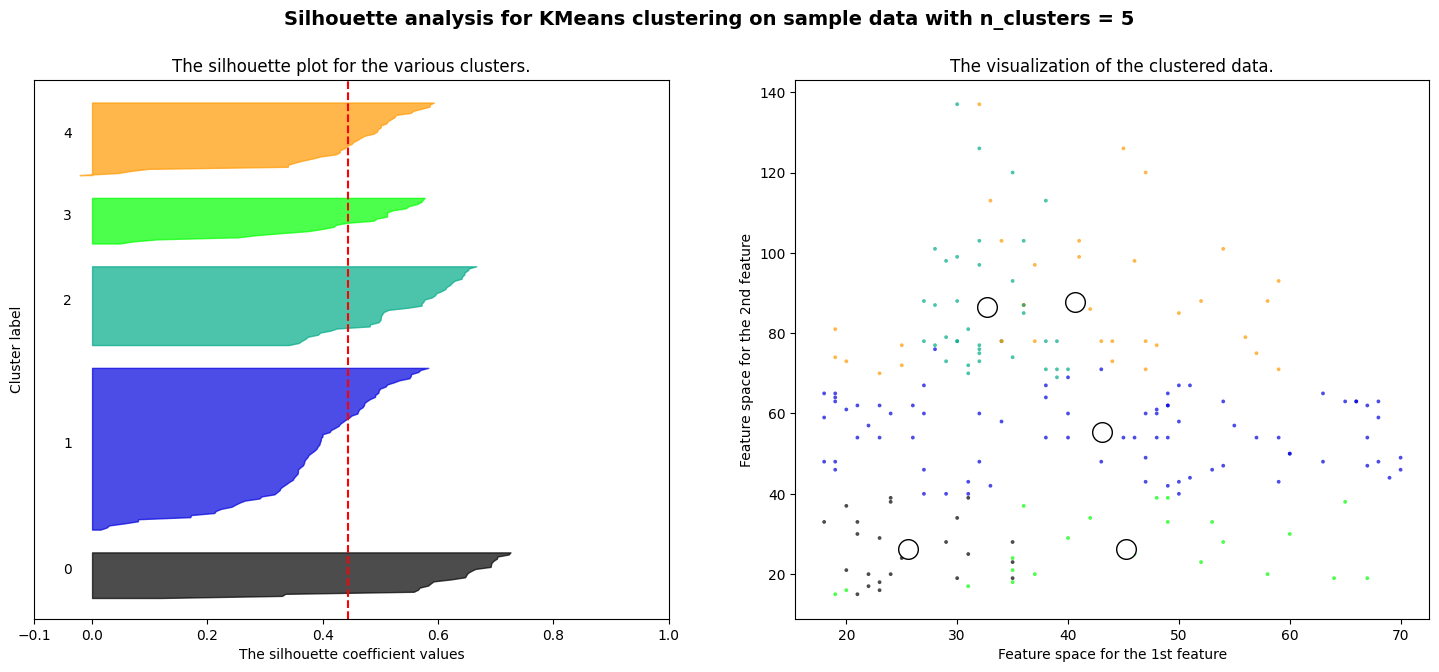

For n_clusters = 6 The average silhouette_score is : 0.4523443947724053


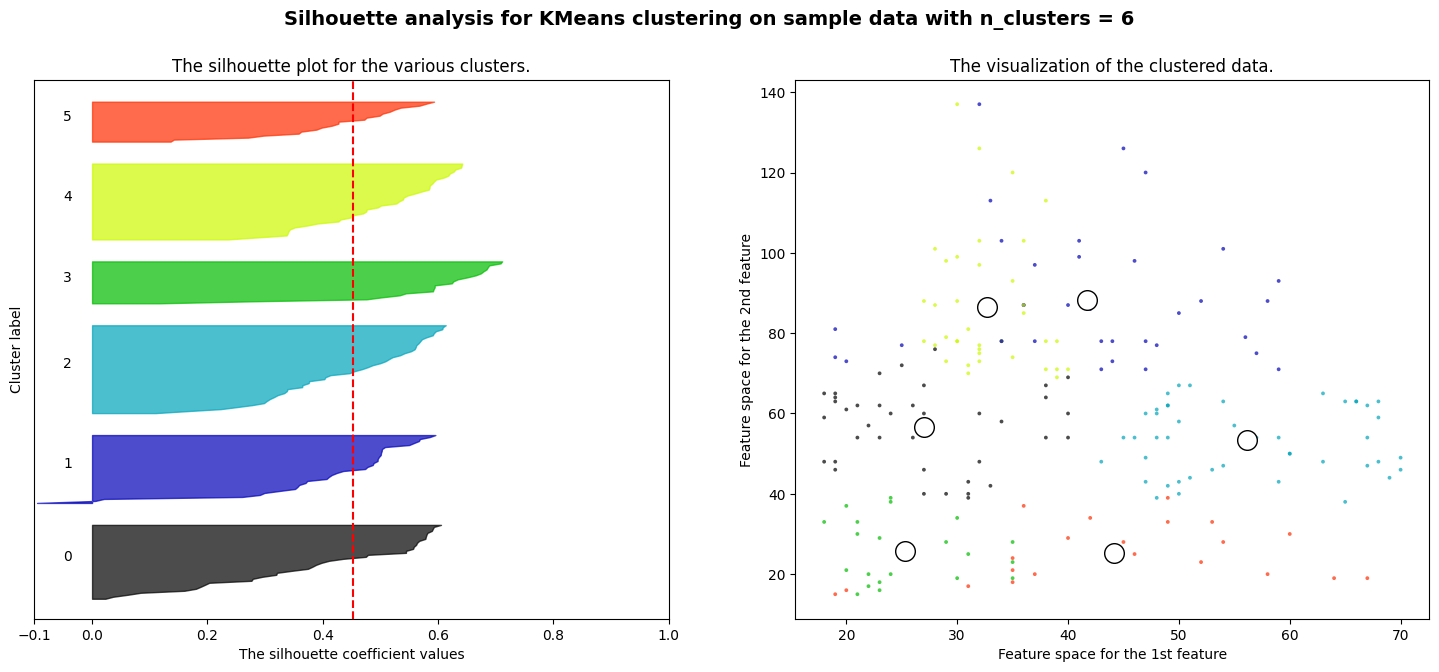

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

     # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

         # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X.iloc[:, 0], X.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
     
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )
     
   


    plt.show()

**Fitting the model on optimum Clusters**

In [26]:
K_model = KMeans(n_clusters = 5)
K_model.fit(X)

KMeans(n_clusters=5)

In [27]:
clusters = K_model.labels_
clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

Assigning the fitted Clusters to the X data to Visualize

In [28]:
X = df.iloc[:,2:]
X = X.assign(cluster = clusters)
X

,Age,Annual Income (k$),Spending Score (1-100),cluster
0,19,15,39,4
1,21,15,81,3
2,20,16,6,4
3,23,16,77,3
4,31,17,40,4
...,...,...,...,...
195,35,120,79,0
196,45,126,28,2
197,32,126,74,0
198,32,137,18,2


**Visualizing the Clusters**

In [29]:
import plotly.express as px

fig = px.scatter_3d(X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',color='cluster', opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

***Finally, Successfully Segmented our Customers According to their Behaviors using Clustering Technique***